<a href="https://colab.research.google.com/github/saltandpurple/deeplearning-exercises/blob/main/fast_ai_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 719 kB 30.3 MB/s 
     |████████████████████████████████| 441 kB 69.6 MB/s 
     |████████████████████████████████| 5.5 MB 38.8 MB/s 
     |████████████████████████████████| 1.3 MB 56.4 MB/s 
     |████████████████████████████████| 1.6 MB 54.9 MB/s 
     |████████████████████████████████| 95 kB 6.6 MB/s 
     |████████████████████████████████| 115 kB 76.4 MB/s 
     |████████████████████████████████| 163 kB 70.0 MB/s 
     |████████████████████████████████| 212 kB 76.8 MB/s 
     |████████████████████████████████| 127 kB 75.9 MB/s 
     |████████████████████████████████| 115 kB 76.1 MB/s 
     |████████████████████████████████| 7.6 MB 56.7 MB/s 
Mounted at /content/gdrive


In [2]:
tank_types = 'mbt','ifv','spaag'
path = Path('gdrive/MyDrive/machine_learning/tanks')

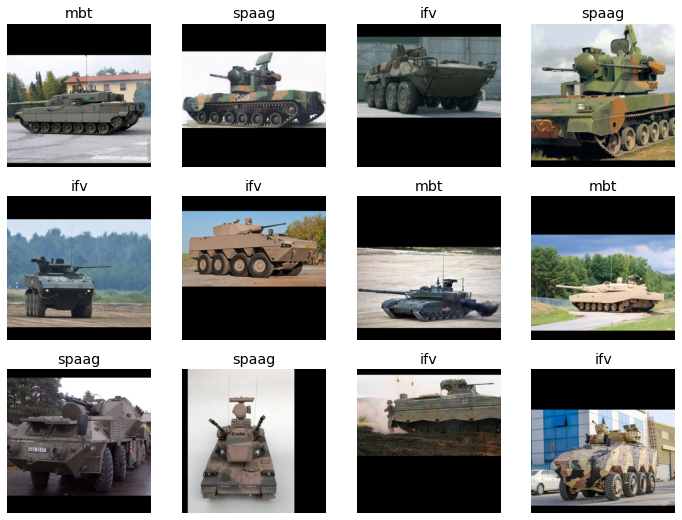

In [3]:
tanks = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(400, ResizeMethod.Pad, pad_mode='zeros'),
    batch_tfms=aug_transforms
    )
dls = tanks.dataloaders(path)
dls.train.show_batch(max_n=12, nrows=3)



In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.919323,1.862932,0.534483,01:55


epoch,train_loss,valid_loss,error_rate,time
0,1.488168,1.221073,0.482759,00:17
1,1.247653,0.801426,0.310345,00:14
2,1.026768,0.579970,0.275862,00:15
3,0.871598,0.483853,0.241379,00:15
4,0.724686,0.427062,0.224138,00:15
5,0.619572,0.360808,0.155172,00:14
6,0.537672,0.315668,0.103448,00:15
7,0.462773,0.292467,0.086207,00:15
8,0.405245,0.283825,0.086207,00:15
9,0.357217,0.282400,0.086207,00:15


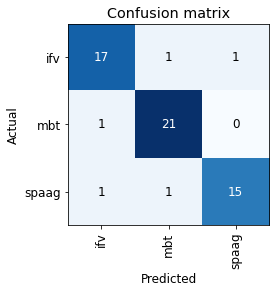

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

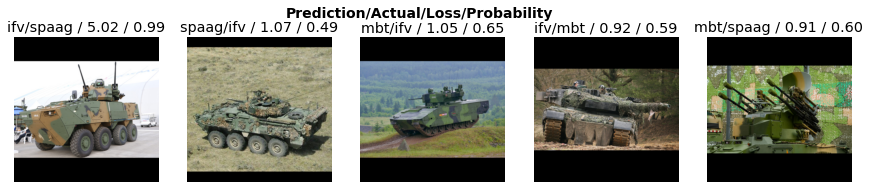

In [6]:
interp.plot_top_losses(5, nrows=1)

In [49]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: ignored

In [33]:
cleaner.delete()

(#6) [0,2,5,22,23,25]

In [50]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

FileNotFoundError: ignored